<a href="https://colab.research.google.com/github/ReginaMb/Data_Mining/blob/main/Ej_Limpieza_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica 1 - Limpieza de Datos**
Equipo 1

Grupo 002

Miércoles 7-10PM

*   1851448 Muñoz Barrientos Regina
*   1941592 Lagos Martinez José Alejandro
*   1849202 Dominguez Victorino Cesar Oswaldo
*   1793775 Rodriguez Guerrero Luisa Victoria

**Netflix Movies and TV Shows**

https://www.kaggle.com/shivamb/netflix-shows


Lo primero es importar las librerías y la base de datos que llamaremos `bd` que decidimos utilizar.

Con la instrucción `bd.shape` obtenemos las dimensiones de nuestro data frame. 

In [3]:
import pandas as pd
import numpy as np

bd = pd.read_csv("netflix_titles.csv")
bd.shape

(7787, 12)

Tenemos 7787 títulos de Netflix registrados y 12 columnas.

La instrucción `bd.head()` muestra los primeros 5 registros.
Análogamente `bd.tail()` muestra los últimos 5 regstros.

In [4]:
bd.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
bd.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Con `bd.columns` vemos los nombres de las columnas

In [6]:
bd.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Decidimos cambiar el nombre de dos columnas, "listed_in" muestra el genero de la serie o película por lo que la renombramos "genre" y "type" cambió a "type_show" porque type es el nombre de una funcion y podría ocasionar problemas más adelante.

In [7]:
bd=bd.rename(columns = {'listed_in':'genre'})
bd=bd.rename(columns = {'type':'type_show'})

Con `bd.dtypes` obtenemos el tipo de dato en cada columna.

In [8]:
bd.dtypes

show_id         object
type_show       object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
genre           object
description     object
dtype: object

Con `bd.isnull().any()` obtenemos `True` en las columnas donde existen datos nulos.

In [9]:
bd.isnull().any()

show_id         False
type_show       False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
genre           False
description     False
dtype: bool

Decidimos llenar campos nulos con "N/A" que significa "Not Available" o No Disponible.

In [10]:
bd_sn = bd.fillna("N/A")
bd_sn.isnull().any()

show_id         False
type_show       False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
genre           False
description     False
dtype: bool

Como todos los datos nulos fueron cambiados por "N/A" todas las columnas dicen `False`, es decir que no cuenta con datos nulos.

Con `bd_sn.type_show.unique()` revisamos los valores únicos para la columna type_show.

In [11]:
bd_sn.type_show.unique()

array(['TV Show', 'Movie'], dtype=object)

Vemos que solo hay dos tipos Serie o Película. Decidimos cambiar los valores de esta columna y que el 1 represente Serie de TV y que el 2 represente Película ya que así se vuelve más fácil trabajar con ellos.

Obtuvimos el código del siguiente sitio: [https://datatofish.com/replace-values-pandas-dataframe/](https://datatofish.com/replace-values-pandas-dataframe/)

In [12]:
bd_sn['type_show'] = bd_sn['type_show'].replace(['TV Show', 'Movie'],[1,2])
bd_sn.type_show.unique()

array([1, 2])

Vemos que esta columna ahora solo tiene 1 y 2.

Lo siguiente es guardar archivos en agrupaciones por lo que ahora tenemos dos "sub bases", una que contiene únicamente series y la otra películas.

In [15]:
shows=bd_sn[bd_sn['type_show']==1]
movies=bd_sn[bd_sn['type_show']==2]
shows.to_csv("Shows_Netflix.csv",index=False)
movies.to_csv("Movies_Netflix.csv",index=False)

Vemos que estos archivos se guardaron exitosamente en el apartado de archivos.

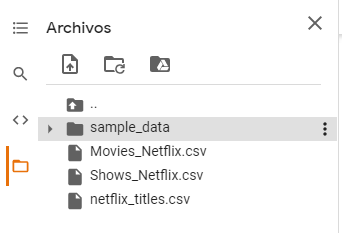
# Preguntas de Interés
**¿Para que me puede servir estas agrupaciones para la práctica siguiente?**

Estas agrupaciones facilitan la comparación entre las clases de una columna, en el caso de los vinos podríamos ver que vinos tienen mejores ratings. En nuestro caso para las series la duración es en temporadas y para las películas en minutos, así que al agruparlos podemos comparar las series y películas por separado. En algunos casos, pasa lo mismo que en muestreo aleatorio estratificado donde hay menor varianza dentro de cada estrato. Aquí algunos valores de otras columnas varían menos si pertenecen a cierta clase por lo que esta menor varianza puede hacer que los modelos que usemos sean mejores.

**Importancia del analisis previo de los datos antes de iniciar las modificaciones.**

Antes de la modificación, el análisis es importante debido a que al realizarse, se puede observar los datos importantes que utilizaremos para un proyecto, la cantidad de datos que son nulos, verificar que los nombres de las columnas estén acorde a los datos presentados en dicha columna, entre otros. Es importante asimilar para saber de donde partir con nuestra información y de ahí empezarla a manejar para moldearla de manera que nos sea cómoda y útil.

Pts Extra. 

`df.dropna()` elimina todas las filas que contengan datos nulos.

Obtenido de [P1-Preparacion de datos](https://github.com/mayraberrones94/FCFM/blob/master/Clase_Mineria_2020/P1-Preparacion%20de%20datos.ipynb)

`df.astype()` puede ser usado para cambiar el tipo de dato de una columna.
 Obtenido de [Python | Pandas DataFrame.astype()](https://www.geeksforgeeks.org/python-pandas-dataframe-astype/)